In [1]:
import sys
sys.executable
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import shutil


Sprawdzenie początkowego rokładu wieku w danych

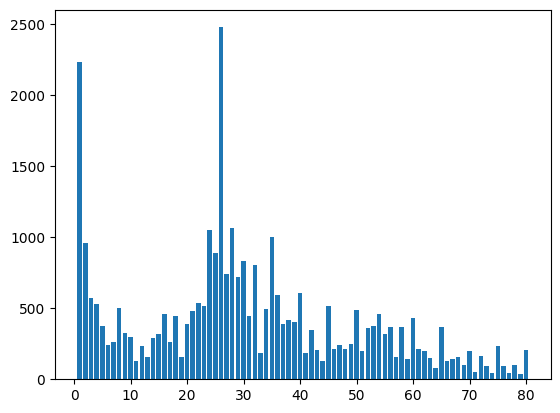

In [2]:
res={}
for filename in os.listdir('./data_merged'):
    f = os.path.join('./data_merged', filename)
        # checking if it is a file
    if os.path.isfile(f):
        age = int(filename.split('_')[0])
            
        if age in res:
            res[age]+=1
        else:
            res[age]=1
    
plt.bar(res.keys(), res.values())
plt.show()

Funkja tworząca number_of_classes klas, z podanego słownik postaci {wiek:liczność}, parametr exactly_equal_counts definiuje czy klasy maja byc dokladnie równej liczności

In [3]:
def equisum_partition(arr,age_labels,p):
    ac = arr.cumsum()

    #sum of the entire array
    partsum = ac[-1]//p 

    #generates the cumulative sums of each part
    cumpartsums = np.array(range(1,p))*partsum

    #finds the indices where the cumulative sums are sandwiched
    inds = np.searchsorted(ac,cumpartsums) 

    #split into approximately equal-sum arrays
    parts = np.split(arr,inds)
    #print("indecies")
    #print(inds)
    range_labels = []
    range_labels.append(f"1-{age_labels[inds[0]]-1}")
    for i in range(0, len(inds) - 1):
        range_labels.append(f"{age_labels[inds[i]]}-{age_labels[inds[i+1]]-1}")
    range_labels.append(f"{age_labels[inds[-1]]}-{age_labels[-1]}")
    #print(parts)
    print("generated ranges")
    print(range_labels)
    return (parts, range_labels)

res_keys_sorted = []
for age_idx in sorted(res):
    res_keys_sorted.append(res[age_idx])

balanced_ranges = equisum_partition(np.array(res_keys_sorted),sorted(res),10)
#10,11 (slabe), 12, 13(slabe), 14, 


generated ranges
['1-2', '3-11', '12-21', '22-25', '26-27', '28-31', '32-38', '39-48', '49-58', '59-80']


[3190, 3231, 3184, 2988, 3215, 3059, 3882, 3065, 3333, 3375]


<BarContainer object of 10 artists>

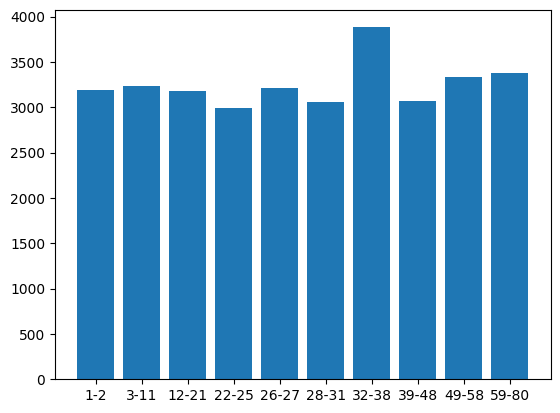

In [4]:
#print(balanced_ranges[0])
#print(balanced_ranges[1])
arrsum = []
for arr in balanced_ranges[0]:
    #print(arr)
    arrsum.append(np.sum(arr))
print(arrsum)
plt.bar(balanced_ranges[1], arrsum)

In [7]:
#generate adequate dataset
def build_dataset(keyranges):
    os.mkdir("./generated_dataset")
    age_dict={}
    for krng in keyranges:
        os.mkdir(f"./generated_dataset/{krng}")
        lower = krng.split('-')[0]
        upper = krng.split('-')[1]
        for age in range(int(lower), int(upper)+1):
            age_dict[age] = krng
        print((lower, upper))
    #print(age_dict)
        #copy photos
    for filename in os.listdir('./data_merged'):
        f = os.path.join('./data_merged', filename)
            # checking if it is a file
        if os.path.isfile(f):
            age = int(filename.split('_')[0])
            #copy to generated_dataset/age_dict[age]
            shutil.copyfile(src=f, dst=f"./generated_dataset/{age_dict[age]}/{filename}")
            
        
build_dataset(balanced_ranges[1])
    

('1', '2')
('3', '11')
('12', '21')
('22', '25')
('26', '27')
('28', '31')
('32', '38')
('39', '48')
('49', '58')
('59', '80')


In [5]:
#split learn/validation

def split_dataset(percent_learn):
    os.mkdir("./generated_dataset_learn")
    os.mkdir("./generated_dataset_validation")
    for dirname in os.listdir('./generated_dataset'):
        os.mkdir(f"./generated_dataset_learn/{dirname}")
        os.mkdir(f"./generated_dataset_validation/{dirname}")
        cnt=0
        cnt_learn = (percent_learn/100) * len(os.listdir(f'./generated_dataset/{dirname}'))
        for filename in os.listdir(f'./generated_dataset/{dirname}'):
            if cnt<cnt_learn:
                shutil.copyfile(src=f"./generated_dataset/{dirname}/{filename}", dst=f"./generated_dataset_learn/{dirname}/{filename}")
            else:
                shutil.copyfile(src=f"./generated_dataset/{dirname}/{filename}", dst=f"./generated_dataset_validation/{dirname}/{filename}")
            cnt+=1
split_dataset(80)